## Mask R-CNN - Inspect Weights of a Trained Model

This notebook includes code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [1]:
pwd

'/home/jaikumar/FinalMaskRCNN/MaskRCNN/bottle'

In [2]:
import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import keras

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Path to bottle trained weights
BOTTLE_MODEL_PATH = os.path.join(MODEL_DIR, "mask_rcnn_bottle_0100.h5")
#BOTTLE_MODEL_PATH ='/home/jaikumar/FinalMaskRCNN/MaskRCNN/logs/mask_rcnn_bottle_0100.h5'

Using TensorFlow backend.


## Configurations

In [21]:
cd samples/bottle


/home/jaikumar/FinalMaskRCNN/MaskRCNN/samples/bottle


In [4]:
cd ..

/home/jaikumar/FinalMaskRCNN/MaskRCNN


In [3]:
pwd

'/home/jaikumar/FinalMaskRCNN/MaskRCNN/bottle'

In [5]:
# Run one of the code blocks

# bottle  dataset
import bottle
config = bottle.BottleConfig()

# MS COCO Dataset
#from coco import coco
#config = coco.CocoConfig()

/home/jaikumar/FinalMaskRCNN/MaskRCNN


## Notebook Preferences

In [10]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

In [11]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Model

In [12]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

# Set weights file path
if config.NAME == "bottle":
    weights_path = BOTTLE_MODEL_PATH
elif config.NAME == "coco":
    weights_path = COCO_MODEL_PATH
# Or, uncomment to load the last model you trained
# weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  /home/jaikumar/FinalMaskRCNN/MaskRCNN/logs/mask_rcnn_bottle_0100.h5


## Review Weight Stats

In [13]:
# Show stats of all trainable weights    
visualize.display_weight_stats(model)

WEIGHT NAME,SHAPE,MIN,MAX,STD
conv1_2/kernel:0,"(7, 7, 3, 64)",-0.8616,+0.8451,+0.1315
conv1_2/bias:0,"(64,)",-0.0002,+0.0004,+0.0001
bn_conv1_2/gamma:0,"(64,)",+0.0835,+2.6411,+0.5091
bn_conv1_2/beta:0,"(64,)",-2.3931,+5.3610,+1.9781
bn_conv1_2/moving_mean:0,"(64,)",-173.0470,+116.3013,+44.5654
bn_conv1_2/moving_variance:0*** Overflow?,"(64,)",+0.0000,+146335.3594,+21847.9668
res2a_branch2a_2/kernel:0,"(1, 1, 64, 64)",-0.6574,+0.3179,+0.0764
res2a_branch2a_2/bias:0,"(64,)",-0.0022,+0.0082,+0.0018
bn2a_branch2a_2/gamma:0,"(64,)",+0.2169,+1.8489,+0.4116
bn2a_branch2a_2/beta:0,"(64,)",-2.1180,+3.7332,+1.1786


# Histograms of Weights

TODO: cleanup this part

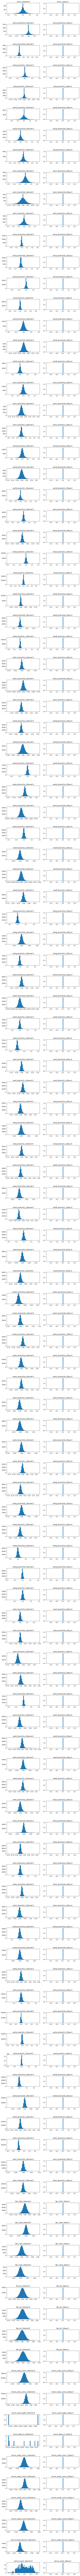

In [14]:
# Pick layer types to display
LAYER_TYPES = ['Conv2D', 'Dense', 'Conv2DTranspose']
# Get layers
layers = model.get_trainable_layers()
layers = list(filter(lambda l: l.__class__.__name__ in LAYER_TYPES, 
                layers))
# Display Histograms
fig, ax = plt.subplots(len(layers), 2, figsize=(10, 3*len(layers)),
                       gridspec_kw={"hspace":1})
for l, layer in enumerate(layers):
    weights = layer.get_weights()
    for w, weight in enumerate(weights):
        tensor = layer.weights[w]
        ax[l, w].set_title(tensor.name)
        _ = ax[l, w].hist(weight[w].flatten(), 50)
